In [1]:
# Importing all the required modules
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
from pandas.plotting import scatter_matrix

# Libraries related to outlier detection
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Encoding and Standardization
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder, StandardScaler

# Ignore all warnings

import warnings
warnings.filterwarnings("ignore")

# Set the default figure size for seaborn plots to 11x8 inches, ensuring all plots have a consistent, larger appearance
sns.set(rc={'figure.figsize':(11,8)})

# Format all floating-point numbers in pandas DataFrames to display with two decimal places,
# providing a cleaner, more readable presentation of numerical data
pd.options.display.float_format = '{:.2f}'.format

from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer


In [2]:
# Load the CSV and Excel files into dataframes
file_2015 = "15tstcar.csv"
file_2016 = "16tstcar.csv"
file_2017 = "17tstcar.xlsx"
file_2018 = "18tstcar.xlsx"
file_2019 = "19tstcar.xlsx"
file_2020 = "20tstcar.xlsx"
file_2021 = "21tstcar.xlsx"
file_2022 = "22tstcar.xlsx"
file_2023 = "23tstcar.xlsx"
file_2024 = "24tstcar.xlsx"

In [3]:
# Load CSV files
df_2015 = pd.read_csv(file_2015)
df_2016 = pd.read_csv(file_2016)

# Load Excel files
df_2017 = pd.read_excel(file_2017)
df_2018 = pd.read_excel(file_2018)
df_2019 = pd.read_excel(file_2019)
df_2020 = pd.read_excel(file_2020)
df_2021 = pd.read_excel(file_2021)
df_2022 = pd.read_excel(file_2022)
df_2023 = pd.read_excel(file_2023)
df_2024 = pd.read_excel(file_2024)

In [4]:
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
df.shape

(45479, 67)

### Step 1: Data preprocessing and Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45479 entries, 0 to 45478
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Model Year                      45479 non-null  int64  
 1   Vehicle Manufacturer Name       45479 non-null  object 
 2   Veh Mfr Code                    45479 non-null  object 
 3   Represented Test Veh Make       45479 non-null  object 
 4   Represented Test Veh Model      45479 non-null  object 
 5   Test Vehicle ID                 45479 non-null  object 
 6   Test Veh Configuration #        45479 non-null  int64  
 7   Test Veh Displacement (L)       45479 non-null  float64
 8   Actual Tested Testgroup         45479 non-null  object 
 9   Vehicle Type                    45479 non-null  object 
 10  Rated Horsepower                45479 non-null  int64  
 11  # of Cylinders and Rotors       43103 non-null  float64
 12  Engine Code                     

Check for missing values

In [6]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    total_rows = len(df)

    if total_missing > 0:
        print("Missing values found in the following columns (sorted by missing count):")
        # Calculate the percentage of missing values
        missing_percentage = round(((missing_values / total_rows) * 100), 2)
        # Combine missing counts and percentages
        data_types = df.dtypes
        missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage, 'Data Type': data_types})
        # Filter and sort by missing values
        sorted_missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
        #print(sorted_missing_info)
        return sorted_missing_info
    else:
        print("No missing values found in the dataframe.")


In [7]:
check_missing_values(df)

Missing values found in the following columns (sorted by missing count):


,Missing Values,Percentage (%),Data Type
FE Bag 4,43715,96.12,float64
Averaging Weighting Factor,43686,96.06,float64
Averaging Group ID,43686,96.06,object
ADFE Test Number,40746,89.59,object
ADFE Total Road Load HP,40746,89.59,float64
ADFE N/V Ratio,40746,89.59,float64
ADFE Equiv. Test Weight (lbs.),40742,89.58,float64
PM (g/mi),38232,84.07,float64
FE Bag 3,27793,61.11,float64
FE Bag 1,24410,53.67,float64


There are no discrepancies with regard to data types of the various columns across the datasets. However, there are several attributes with significant number of null values in the dataset. Depending on the importance of the variable, we either perform imputation or remove the attribute from the list of predictor variables.

From the above list, we remove the attributes with greater than 50% of the values missing (ADFE Test Number, ADFE Total Road Load HP, ADFE N/V Ratio, ADFE Equiv.Test Weight, PM(g/mi), FE Bag 3, FE Bag 1, FE Bag 2 and N2O (g/mi)). 

In [8]:
def drop_columns_with_missing_values(df, columns_to_drop):
    df_reduced = df.copy()
    
    # Drop the specified columns
    df_reduced = df_reduced.drop(columns=columns_to_drop, errors='ignore')
    
    return df_reduced

In [9]:
columns_to_remove = [
    'FE Bag 4', 'Averaging Weighting Factor', 'Averaging Group ID', 
    'ADFE Test Number', 'ADFE Total Road Load HP', 'ADFE N/V Ratio', 
    'ADFE Equiv. Test Weight (lbs.)', 'PM (g/mi)', 'FE Bag 3', 
    'FE Bag 1', 'FE Bag 2', 'N2O (g/mi)'
]
df_reduced = drop_columns_with_missing_values(df, columns_to_remove)

In [10]:
check_missing_values(df_reduced)

Missing values found in the following columns (sorted by missing count):


,Missing Values,Percentage (%),Data Type
DT-Inertia Work Ratio Rating,9389,20.64,float64
DT-Absolute Speed Change Ratg,9389,20.64,float64
DT-Energy Economy Rating,9389,20.64,float64
CH4 (g/mi),8816,19.38,float64
NOx (g/mi),6266,13.78,float64
THC (g/mi),6008,13.21,float64
CO (g/mi),5902,12.98,float64
CO2 (g/mi),2913,6.41,float64
Aftertreatment Device Cd,2444,5.37,object
Aftertreatment Device Desc,2444,5.37,object


In [11]:
## New Mode Imputation

def impute_data(df, knn_neighbors=7):
    # Create a copy of the DataFrame to avoid changing the original
    df_imputed = df.copy()
    
    # Separate numeric and categorical columns
    numeric_cols = df_imputed.select_dtypes(include=['number']).columns
    categorical_cols = [
        'Vehicle Manufacturer Name', 
        'Vehicle Type', 
        'Tested Transmission Type Code', 
        'Transmission Lockup?', 
        'Drive System Code', 
        'Transmission Overdrive Desc', 
        'Shift Indicator Light Use Desc', 
        'Test Procedure Description', 
        'Test Fuel Type Description', 
        'Test Category', 
        'Aftertreatment Device Cd',
        'Aftertreatment Device Desc',  # Explicitly add missing categorical cols
        'Engine Code'
    ]

    # 1. KNN Imputation for numeric columns
    knn_imputer = KNNImputer(n_neighbors=knn_neighbors)
    df_imputed[numeric_cols] = pd.DataFrame(knn_imputer.fit_transform(df_imputed[numeric_cols]), 
                                            columns=numeric_cols, index=df_imputed.index)

    # 2. Encode categorical columns as integers and replace missing values with np.nan
    categorical_codes = {}
    for col in categorical_cols:
        df_imputed[col] = pd.Categorical(df_imputed[col]).codes
        df_imputed[col].replace(-1, np.nan, inplace=True)  # Replace -1 with np.nan for missing values
        categorical_codes[col] = pd.Categorical(df[col].dropna()).categories  # Save original categories

    # Apply MICE imputer to encoded categorical columns
    mice_imputer = IterativeImputer(max_iter=10, random_state=42, sample_posterior=True)
    try:
        imputed_categorical = pd.DataFrame(mice_imputer.fit_transform(df_imputed[categorical_cols]), 
                                           columns=categorical_cols, index=df_imputed.index)
    except Exception as e:
        print("MICE imputation failed for categorical columns:", e)
        # Fallback: Simple mode imputation
        simple_imputer = SimpleImputer(strategy='most_frequent')
        imputed_categorical = pd.DataFrame(simple_imputer.fit_transform(df_imputed[categorical_cols]), 
                                           columns=categorical_cols, index=df_imputed.index)

    # Round imputed values to nearest integer, clip to valid range, and reconvert to categories
    for col in categorical_cols:
        categories = categorical_codes[col]
        imputed_categorical[col] = imputed_categorical[col].round().clip(0, len(categories) - 1).astype(int)
        df_imputed[col] = pd.Categorical.from_codes(imputed_categorical[col], categories=categories)

    return df_imputed


In [12]:
df_imputed = impute_data(df_reduced)

In [13]:
check_missing_values(df_imputed)

No missing values found in the dataframe.


In [14]:
categorical_cols = df_reduced.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")

Column 'Vehicle Manufacturer Name' has 55 unique values.
Column 'Veh Mfr Code' has 54 unique values.
Column 'Represented Test Veh Make' has 97 unique values.
Column 'Represented Test Veh Model' has 2326 unique values.
Column 'Test Vehicle ID' has 4366 unique values.
Column 'Actual Tested Testgroup' has 2432 unique values.
Column 'Vehicle Type' has 3 unique values.
Column 'Engine Code' has 2031 unique values.
Column 'Tested Transmission Type Code' has 8 unique values.
Column 'Tested Transmission Type' has 8 unique values.
Column 'Transmission Lockup?' has 2 unique values.
Column 'Drive System Code' has 5 unique values.
Column 'Drive System Description' has 5 unique values.
Column 'Transmission Overdrive Desc' has 3 unique values.
Column 'Shift Indicator Light Use Desc' has 4 unique values.
Column 'Test Number' has 23168 unique values.
Column 'Test Originator' has 2 unique values.
Column 'Analytically Derived FE?' has 2 unique values.
Column 'Test Procedure Description' has 16 unique val

Among the categorical variables, some of them have extremely large number of values such as Represented Test Veh Model, Test Vehicle ID, Actual Tested Testgroup and Engine Code. Choosing these values will create 

When selecting categorical variables, it is important to consider its relevance to the response variable as well as the number of unique values. Some of the categorical attributes such as Represented Test Veh Model, Test Vehicle ID, Actual Tested Testgroup and Engine Code have an extremely large number of values. Encoding these values will lead to issues with model interpretability and complexity. Taking these factors into account we choose the following categorical variables - **Vehicle Manufacturer Name, Vehicle Type, TTested Transmission Type Code, Transmission Lockup?, Drive System Code, Transmission Overdrive Desc, Shift Indicator Light Use Desc, Test Procedure Description, Test Fuel Type Description, Test Category and Aftertreatment Device Cd**

In [15]:
df_imputed.describe()

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,RND_ADJ_FE,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2)
count,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,...,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00,45479.00
mean,2019.39,1.18,3.39,298.05,5.44,6.28,1.95,4396.41,3.62,32.95,...,49.98,8.00,7.90,7.45,39.26,0.23,0.02,11.09,0.11,0.02
std,2.87,2.03,7.18,151.48,1.82,2.72,0.21,858.87,1.15,46.05,...,363.58,24.67,24.61,24.85,11.94,0.32,0.01,11.29,0.30,0.09
min,2015.00,0.00,0.00,1.00,2.00,1.00,1.00,2125.00,0.00,0.00,...,0.00,-29.17,-24.01,-17.82,9.87,-0.85,0.00,-99.90,-1.98,-0.09
25%,2017.00,0.00,2.00,183.00,4.00,6.00,2.00,3750.00,3.14,24.30,...,24.00,-0.62,-0.51,-0.57,30.62,0.05,0.02,5.26,-0.02,0.02
50%,2019.00,0.00,2.50,275.00,4.86,7.00,2.00,4250.00,3.42,26.90,...,31.10,0.62,0.41,-0.10,38.10,0.25,0.02,11.40,0.11,0.02
75%,2022.00,1.00,3.50,362.00,6.00,8.00,2.00,5000.00,3.77,31.20,...,41.10,2.70,1.99,0.39,46.70,0.42,0.03,17.79,0.24,0.03
max,2024.00,25.00,100.00,1839.00,16.00,10.00,2.00,9000.00,9.99,999.90,...,10000.00,99.99,99.99,99.99,150.00,2.41,0.22,150.20,10.00,10.00


### Performing encoding of selected categorical variables

Encoding categorical attributes with high cardinality values can increase the complexity and lead to model interpretability issues. For example, Vehicle Manufacturer Name attribute has 55 unique values. So, performing one-hot encoding will result in the addition of 55 new columns to the dataset. In order to prevent that, we will first re-categorize the various vehicle manufacturer names based on manufacturer groups and then perform one-hot encoding. 

In [16]:
brand_groups = {
    'Volkswagen Group': ['Audi', 'Bentley', 'Bugatti', 'Volkswagen', 'Porsche', 'Lamborghini'],
    'FCA Group': ['FCA Italy', 'FCA US LLC', 'Ferrari', 'Maserati'],
    'Ford Motor Company': ['FOMOCO'],
    'General Motors': ['GM'],
    'Hyundai Motor Group': ['Hyundai', 'Kia', 'Genesis'],
    'BMW Group': ['BMW', 'Mini', 'Rolls-Royce'],
    'Toyota Group': ['Toyota', 'Lexus'],
    'Daimler AG': ['Mercedes-Benz'],
    'Honda': ['Honda', 'Acura'],
    'Tata Motors': ['Jaguar Land Rover L'],
    'Electric Vehicle Manufacturers': ['Tesla', 'Rivian Automotive L', 'Lucid USA, Inc', 'Fisker Group Inc.'],
    'High-Performance and Specialty': [
        'Aston Martin', 'McLaren Automotive', 'Pagani Automobili S', 'Koenigsegg', 
        'Rimac Automobili', 'Maserati', 'Bugatti Rimac LLC', 'RUF'
    ],
    'Asian Manufacturers': ['BYD Motors Inc.', 'Nissan', 'Mazda', 'Mitsubishi Motors Co', 'Subaru'],
    'Other': [
        'Quantum Fuel System', 'CSC', 'Mobility Ventures L', 'Bluecar, SAS', 
        'Ineos Automotive Li', 'Lordstown EV Corpor', 'Canoo Technologies', 
        'Faraday&Future Inc.', 'Vinfast Trading and', 'Mullen Automotive'
    ]
}

def map_manufacturer_group(df, column, brand_groups):
    # Create a reverse mapping dictionary from brand_groups
    group_mapping = {manufacturer: group for group, manufacturers in brand_groups.items() for manufacturer in manufacturers}
    
    # Map the column values to their respective groups
    df[column] = df[column].map(group_mapping) 
    
    return df

In [17]:
# Usage
df_vmn = map_manufacturer_group(df_imputed, 'Vehicle Manufacturer Name', brand_groups)

In [18]:
def label_encode_df(df):
    # Create a copy of the DataFrame to avoid modifying the original
    df_encoded = df.copy()
    
    # Loop through all categorical columns and apply label encoding
    for col in df_encoded.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert to string in case of mixed types
    
    return df_encoded

In [19]:
df_encoded = label_encode_df(df_vmn)

In [20]:
len(df_encoded.columns)

55

### Removing multivariate outliers using a combination of three techniques (KNN, Decision Tree and Mahalanobis distance)

In [21]:
def removing_outliers(df, selected_columns):
    # Keep the other columns intact
    other_columns = df.drop(columns=selected_columns)
    
    # Select only the specified columns for outlier detection
    df_num = df[selected_columns]
    
    # Row count before removing outliers
    before_count = len(df_num)
    
    # Local Outlier Factor with lower contamination (1-2%)
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
    y_pred_lof = lof.fit_predict(df_num)
    
    # Isolation Forest with lower contamination (1-2%)
    iforest = IsolationForest(n_estimators=100, contamination=0.01)
    y_pred_if = iforest.fit_predict(df_num)
    
    # Elliptic Envelope with lower contamination (1-2%)
    rob_cov = EllipticEnvelope(contamination=0.01)
    rob_cov.fit(df_num)
    y_pred_rob = rob_cov.predict(df_num)
    
    # Assign outlier labels
    df_num["y_pred_lof"] = y_pred_lof
    df_num["y_pred_if"] = y_pred_if
    df_num["y_pred_rob"] = y_pred_rob
    
    df_num["y_pred_lof_2"] = np.where(df_num["y_pred_lof"] < 0, -1, 0)
    df_num["y_pred_if_2"] = np.where(df_num["y_pred_if"] < 0, -1, 0)
    df_num["y_pred_rob_2"] = np.where(df_num["y_pred_rob"] < 0, -1, 0)
    
    # Crosstab for checking consistency (optional for debugging)
    pd.crosstab(df_num["y_pred_if_2"], df_num["y_pred_rob_2"])
    
    # Sum of outlier labels from all methods
    df_num["all_out"] = df_num.loc[:, ["y_pred_if_2", "y_pred_rob_2", "y_pred_lof_2"]].sum(axis=1)
    
    # Filter out outliers
    df_num_filtered = df_num[df_num["all_out"] > -1]
    
    # Row count after removing outliers
    after_count = len(df_num_filtered)
    
    # Calculate and print the percentage of rows removed
    percentage_removed = ((before_count - after_count) / before_count) * 100
    print(f"Percentage of rows removed as outliers: {percentage_removed:.2f}%")
    
    # Drop outlier-related columns used for filtering
    df_num_filtered = df_num_filtered.drop(columns=["y_pred_lof", "y_pred_if", "y_pred_rob", "y_pred_lof_2", "y_pred_if_2", "y_pred_rob_2", "all_out"])
    
    # Concatenate the filtered numerical columns with the other non-imputed columns
    final_df = pd.concat([other_columns.reset_index(drop=True), df_num_filtered.reset_index(drop=True)], axis=1)
    
    return final_df

In [22]:
df_outliers_removed = removing_outliers(df_encoded, df_imputed.select_dtypes(include=['object']).columns.tolist())

Percentage of rows removed as outliers: 2.96%


In [23]:
df_outliers_removed.columns

Index(['Model Year', 'Test Veh Configuration #', 'Test Veh Displacement (L)',
       'Vehicle Type', 'Rated Horsepower', '# of Cylinders and Rotors',
       'Engine Code', 'Tested Transmission Type Code', '# of Gears',
       'Transmission Lockup?', 'Drive System Code',
       'Transmission Overdrive Code', 'Transmission Overdrive Desc',
       'Equivalent Test Weight (lbs.)', 'Axle Ratio', 'N/V Ratio',
       'Shift Indicator Light Use Cd', 'Shift Indicator Light Use Desc',
       'Test Procedure Cd', 'Test Procedure Description', 'Test Fuel Type Cd',
       'Test Fuel Type Description', 'Test Category', 'THC (g/mi)',
       'CO (g/mi)', 'CO2 (g/mi)', 'NOx (g/mi)', 'CH4 (g/mi)', 'RND_ADJ_FE',
       'DT-Inertia Work Ratio Rating', 'DT-Absolute Speed Change Ratg',
       'DT-Energy Economy Rating', 'Target Coef A (lbf)',
       'Target Coef B (lbf/mph)', 'Target Coef C (lbf/mph**2)',
       'Set Coef A (lbf)', 'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)',
       'Aftertreatment De

### Performing standardization 

In [24]:

def standardize_numerical_columns(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_standardized = df.copy()
    
    # Initialize the StandardScaler
    scaler = RobustScaler()
    
    # Fit and transform only the numerical columns
    df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    return df_standardized

# Usage
df_standardized = standardize_numerical_columns(df_outliers_removed)

We select several vehicle specific characteristics, emission specific factors along with factors related to drive and transmission for predicting CO emission and attributes related to Engine and Powertrain, Aerodynamics and Resistance, Vehicle load and Weight for  Miles per Gallon prediction.

In [25]:
# Attributes for predicting miles per gallon (RND_ADJ_FE)
mpg_attributes = [
    'Vehicle Manufacturer Name', 'Rated Horsepower', '# of Cylinders and Rotors',
    'Test Veh Displacement (L)', 'Transmission Overdrive Code', '# of Gears', 'Axle Ratio',
    'Target Coef A (lbf)', 'Target Coef B (lbf/mph)', 'Target Coef C (lbf/mph**2)',
    'Set Coef A (lbf)', 'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)',
    'Equivalent Test Weight (lbs.)', 'DT-Inertia Work Ratio Rating', 'RND_ADJ_FE'
]

# Attributes for predicting CO emissions (CO (g/mi))
co_emission_attributes = [
    'Vehicle Manufacturer Name', 'Vehicle Type', 'Rated Horsepower', '# of Cylinders and Rotors',
    'Test Veh Displacement (L)', 'Axle Ratio', 'N/V Ratio', 'THC (g/mi)', 'NOx (g/mi)',
    'CH4 (g/mi)', 'Aftertreatment Device Desc', 'Test Fuel Type Description',
    'Drive System Description', 'Transmission Overdrive Desc', 'Equivalent Test Weight (lbs.)',
    'Shift Indicator Light Use Desc', 'CO (g/mi)'
]

Data Preparation for training models

In [26]:
df_mpg = df_standardized[mpg_attributes].dropna()

# Separate features and target
X_mpg = df_mpg.drop(columns='RND_ADJ_FE')
y_mpg = df_mpg['RND_ADJ_FE']

# One-hot encode categorical features
X_mpg = pd.get_dummies(X_mpg, drop_first=True)

# Split data into training and testing sets
X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg = train_test_split(X_mpg, y_mpg, test_size=0.2, random_state=42)

In [27]:
df_co = df_standardized[co_emission_attributes].dropna()

# Separate features and target
X_co = df_co.drop(columns='CO (g/mi)')
y_co = df_co['CO (g/mi)']

# One-hot encode categorical features
X_co = pd.get_dummies(X_co, drop_first=True)

# Split data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(X_co, y_co, test_size=0.2, random_state=42)


### Multiple Linear Regression Model

In [28]:

def multipleLinearRegression(X_train,X_test,y_train,y_test,pred):
    # Step 1: Train MLR model
    mlr_mpg = LinearRegression()
    mlr_mpg.fit(X_train, y_train)

    # Step 2: Predict and evaluate the model
    y_pred = mlr_mpg.predict(X_test)
    print("Performance for " + pred + " Prediction:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))


In [29]:
#multipleLinearRegression(X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg,"RND_ADJ_FE")

In [30]:
#multipleLinearRegression(X_train_co, X_test_co, y_train_co, y_test_co,"CO (g/mi)")

### K-Nearest Neighbors (KNN)

In [31]:

def KNN(X_train,X_test,y_train,y_test,pred):
    # Step 1: Train KNN model
    knn_mpg = KNeighborsRegressor(n_neighbors=5)
    knn_mpg.fit(X_train, y_train)

    # Step 2: Predict and evaluate the model
    y_pred = knn_mpg.predict(X_test)
    print("Performance for RND_ADJ_FE Prediction using KNN:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))



In [32]:
#KNN(X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg,"RND_ADJ_FE")

In [33]:
#KNN(X_train_co, X_test_co, y_train_co, y_test_co,"CO (g/mi)")

### K-Nearest Neighbors with grid search (KNN)

In [34]:

def KNNGridSearch(X_train,X_test,y_train,y_test,pred):

# Define the hyperparameters grid to tune
    knn_params = {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    # Step 1: Perform Grid Search
    knn = KNeighborsRegressor()
    grid_search_mpg = GridSearchCV(knn, knn_params, cv=5, scoring='r2', n_jobs=-1)
    grid_search_mpg.fit(X_train, y_train)

    # Best model for RND_ADJ_FE
    best_knn_mpg = grid_search_mpg.best_estimator_

    # Step 2: Predict and evaluate the best KNN model
    y_pred = best_knn_mpg.predict(X_test)
    print("Best Hyperparameters for " + pred + " Prediction:", grid_search_mpg.best_params_)
    print("Performance for " + pred + " Prediction using Best KNN:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    return knn


In [35]:
knn_model_mpg = KNNGridSearch(X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg,"RND_ADJ_FE")

Best Hyperparameters for RND_ADJ_FE Prediction: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Performance for RND_ADJ_FE Prediction using Best KNN:
MAE: 0.41338557825231154
MSE: 116.27011765442322
R-squared: 0.7369506145357123


In [36]:
knn_model_co = KNNGridSearch(X_train_co, X_test_co, y_train_co, y_test_co,"CO (g/mi)")

Best Hyperparameters for CO (g/mi) Prediction: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Performance for CO (g/mi) Prediction using Best KNN:
MAE: 0.48724708355218854
MSE: 122.55028136135957
R-squared: 0.5066148568699473


### Random Forest

In [37]:

def randomForest(X_train,X_test,y_train,y_test,pred): 
    # Step 1: Train Random Forest model
    rf_mpg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_mpg.fit(X_train, y_train)

    # Step 2: Predict and evaluate the model 
    y_pred = rf_mpg.predict(X_test)
    print("Performance for " + pred + " Prediction using Random Forest:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    return rf_mpg

In [ ]:
randomForest(X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg,"RND_ADJ_FE")

Performance for RND_ADJ_FE Prediction using Random Forest:
MAE: 0.6433618421475025
MSE: 144.31156373301843
R-squared: 0.6735096779708405


In [ ]:
randomForest(X_train_co, X_test_co, y_train_co, y_test_co,"CO (g/mi)")

Performance for CO (g/mi) Prediction using Random Forest:
MAE: 0.3747078670751514
MSE: 43.57979371490021
R-squared: 0.8245485647135876


### Random Forest with grid search

In [40]:

def randomForestGridSearch(X_train,X_test,y_train,y_test,pred): 
    # Define the hyperparameters grid to tune
    rf_params = {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Step 1: Perform Grid Search
    rf = RandomForestRegressor(random_state=42)
    grid_search_rf = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
    grid_search_rf.fit(X_train, y_train)

    # Best model
    best_rf_co = grid_search_rf.best_estimator_

    # Step 2: Predict and evaluate the best Random Forest model
    y_pred = best_rf_co.predict(X_test)
    print("Best Hyperparameters for " + pred + " Emissions Prediction:", grid_search_rf.best_params_)
    print("Performance for " + pred + " Emissions Prediction using Best Random Forest:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))


In [ ]:
rf_model_mpg = randomForestGridSearch(X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg,"RND_ADJ_FE")

In [ ]:
rf_model_co = randomForestGridSearch(X_train_co, X_test_co, y_train_co, y_test_co,"CO (g/mi)")

### XGBoost

In [43]:

# Define the hyperparameters grid to tune
xgb_params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

def train_xgboost_model(X, y, model_name):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the XGBoost model
    xgb_model = XGBRegressor(random_state=42)

    # Initialize RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
    
    # Perform hyperparameter tuning
    print(f"Training XGBoost model for {model_name} prediction...")
    random_search.fit(X_train, y_train)
    
    # Best model with optimal hyperparameters
    best_xgb_model = random_search.best_estimator_
    print(f"\nBest Parameters for {model_name}:", random_search.best_params_)

    # Evaluate the model
    y_pred = best_xgb_model.predict(X_test)
    print(f"\nPerformance for {model_name} Prediction using XGBoost:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))

    return best_xgb_model

# Prepare the data for RND_ADJ_FE (mileage) prediction
mpg_features = [
    'Rated Horsepower', '# of Cylinders and Rotors', 'Test Veh Displacement (L)', '# of Gears', 
    'Axle Ratio', 'Target Coef A (lbf)', 'Target Coef B (lbf/mph)', 'Target Coef C (lbf/mph**2)', 
    'Set Coef A (lbf)', 'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)', 
    'Equivalent Test Weight (lbs.)', 'DT-Inertia Work Ratio Rating'
]

df_mpg = df_standardized[mpg_features + ['RND_ADJ_FE']].dropna()
X_mpg = df_mpg[mpg_features]
y_mpg = df_mpg['RND_ADJ_FE']

# Train XGBoost model for RND_ADJ_FE prediction
best_xgb_mpg_model = train_xgboost_model(X_mpg, y_mpg, "RND_ADJ_FE (mileage)")

# Prepare the data for CO emissions prediction
co_features = [
    'Rated Horsepower', '# of Cylinders and Rotors', 'Test Veh Displacement (L)', 'Axle Ratio', 
    'N/V Ratio', 'THC (g/mi)', 'NOx (g/mi)', 'CH4 (g/mi)', 'Equivalent Test Weight (lbs.)'
]

df_co = df_standardized[co_features + ['CO (g/mi)']].dropna()
X_co = df_co[co_features]
y_co = df_co['CO (g/mi)']

# Train XGBoost model for CO emissions prediction
best_xgb_co_model = train_xgboost_model(X_co, y_co, "CO emissions")

Training XGBoost model for RND_ADJ_FE (mileage) prediction...

Best Parameters for RND_ADJ_FE (mileage): {'colsample_bytree': 0.5714334089609704, 'learning_rate': 0.14017769458977059, 'max_depth': 7, 'n_estimators': 51, 'subsample': 0.8609993861334124}

Performance for RND_ADJ_FE (mileage) Prediction using XGBoost:
MAE: 0.9751942908705936
MSE: 75.74950353070574
R-squared: 0.8064806760138643
Training XGBoost model for CO emissions prediction...

Best Parameters for CO emissions: {'colsample_bytree': 0.5714334089609704, 'learning_rate': 0.14017769458977059, 'max_depth': 7, 'n_estimators': 51, 'subsample': 0.8609993861334124}

Performance for CO emissions Prediction using XGBoost:
MAE: 0.47310292023212014
MSE: 4.575536144814419
R-squared: 0.9778035702085017


### Gradient Boosted Trees

In [44]:
 
def gradientBoostedTree(X_train, X_test, y_train, y_test):
    # Suppress warning messages
    warnings.filterwarnings('ignore')
 
 
    # Define the Gradient Boosting model
    gb_model = GradientBoostingRegressor(random_state=42)
 
    # Define the hyperparameter grid
    param_grid = {
        'n_estimators': randint(50, 200, 500),
        'max_depth': randint(3,5, 20),
        'learning_rate': [0.01, 0.001,0.1,  ]
    }
 
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(gb_model, param_grid, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1, return_train_score=True, error_score='raise')
 
    # Perform hyperparameter tuning
    print("Training Gradient Boosting...")
    random_search.fit(X_train, y_train)
 
    # Display the best parameters
    best_params = random_search.best_params_
    print("\nBest Parameters:", best_params)
 
    # Train the Gradient Boosting model with the best parameters
    best_gb_model = GradientBoostingRegressor(random_state=42, **best_params)
    print("Hyperparameters of the Best Model:", best_gb_model.get_params())
    best_gb_model.fit(X_train, y_train)
 
    # Evaluate the model
    y_pred = best_gb_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("R-2 Score:", r2)
 
    # Save the best model
    with open('best_gb_model.pkl', 'wb') as f:
        pickle.dump(best_gb_model, f)
    print("Best Gradient Boosting model saved as 'best_gb_model.pkl'")
 
    # Load the model from disk
    with open('best_gb_model.pkl', 'rb') as f:
        loaded_gb_model = pickle.load(f)
 
    # Apply the loaded model on a new sample
    new_sample = X_test.iloc[0, :].values.reshape(1, -1)
    prediction = loaded_gb_model.predict(new_sample)
    print("\nPrediction for a new sample:", prediction)
 
    # Save all R-2 values and parameter combinations
    cv_results_df = pd.DataFrame(random_search.cv_results_)
    cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
    print("\nAll R-2 values and parameter combinations:")
    print(cv_results_df)
    return best_gb_model


In [45]:
gb_model_mpg = gradientBoostedTree(X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg)

Training Gradient Boosting...

Best Parameters: {'learning_rate': 0.01, 'max_depth': 24, 'n_estimators': 607}
Hyperparameters of the Best Model: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 24, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 607, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
R-2 Score: 0.7382559735805483
Best Gradient Boosting model saved as 'best_gb_model.pkl'

Prediction for a new sample: [-0.27985964]

All R-2 values and parameter combinations:
                                              params  mean_test_score  \
0  {'learning_rate': 0.1, 'max_depth': 24, 'n_est...             0.60   
1  {'learning_rate': 0.1, 'max_depth': 23, 'n_est...             0.60   


In [46]:
gb_model_co = gradientBoostedTree(X_train_co, X_test_co, y_train_co, y_test_co)

Training Gradient Boosting...

Best Parameters: {'learning_rate': 0.01, 'max_depth': 23, 'n_estimators': 652}
Hyperparameters of the Best Model: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 23, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 652, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
R-2 Score: 0.851655678069881
Best Gradient Boosting model saved as 'best_gb_model.pkl'

Prediction for a new sample: [-0.13377719]

All R-2 values and parameter combinations:
                                              params  mean_test_score  \
0  {'learning_rate': 0.1, 'max_depth': 24, 'n_est...             0.78   
1  {'learning_rate': 0.1, 'max_depth': 23, 'n_est...             0.76   
2

In [47]:
def catBoost(X_train, X_test, y_train, y_test, model_name):

    # Define the hyperparameters grid to tune
    catboost_params = {
        'iterations': randint(50, 200),
        'depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.2),
        'l2_leaf_reg': uniform(1, 10),
        'subsample': uniform(0.5, 0.5)
    }

    # Initialize the CatBoost model
    cat_model = CatBoostRegressor(silent=True, random_state=42)

    # Initialize RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(cat_model, catboost_params, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
    
    # Perform hyperparameter tuning
    print(f"Training CatBoost model for {model_name} prediction...")
    random_search.fit(X_train, y_train)
    
    # Best model with optimal hyperparameters
    best_cat_model = random_search.best_estimator_
    print(f"\nBest Parameters for {model_name}:", random_search.best_params_)

    # Evaluate the model
    y_pred = best_cat_model.predict(X_test)
    print(f"\nPerformance for {model_name} Prediction using CatBoost:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    return best_cat_model


In [48]:
cat_model_mpg = catBoost(X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg,"CatBoost")

Training CatBoost model for CatBoost prediction...

Best Parameters for CatBoost: {'depth': 9, 'iterations': 142, 'l2_leaf_reg': 2.8343478986616377, 'learning_rate': 0.16593820005455387, 'subsample': 0.7984250789732434}

Performance for CatBoost Prediction using CatBoost:
MAE: 1.1456435044857984
MSE: 167.41936719026273
R-squared: 0.6212306090107137


In [49]:
cat_model_co = catBoost(X_train_co, X_test_co, y_train_co, y_test_co,"CatBoost")

Training CatBoost model for CatBoost prediction...

Best Parameters for CatBoost: {'depth': 9, 'iterations': 142, 'l2_leaf_reg': 2.8343478986616377, 'learning_rate': 0.16593820005455387, 'subsample': 0.7984250789732434}

Performance for CatBoost Prediction using CatBoost:
MAE: 0.5817887339131156
MSE: 43.297695456132686
R-squared: 0.8256842870328889


This code extracts and visualizes the top 10 features most important to each model, displaying them as bar plots for quick comparison.

RF MPG: 15 MPG attributes: 16
RF CO: 41 CO attributes: 17
GB MPG: 15 MPG attributes: 16
GB CO: 41 CO attributes: 17
XGB MPG: 15 MPG attributes: 16
XGB CO: 41 CO attributes: 17
CatBoost MPG: 15 MPG attributes: 16
CatBoost CO: 41 CO attributes: 17


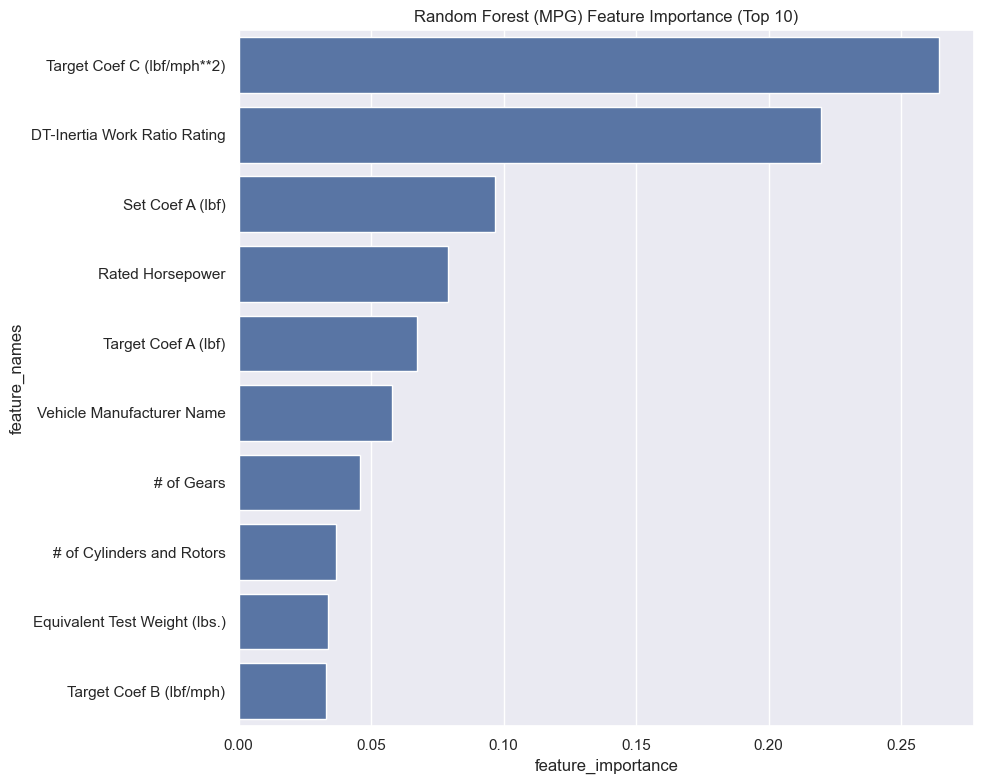


Top 10 features for Random Forest (MPG):
1. Target Coef C (lbf/mph**2): 0.0579
2. DT-Inertia Work Ratio Rating: 0.0790
3. Set Coef A (lbf): 0.0369
4. Rated Horsepower: 0.0232
5. Target Coef A (lbf): 0.0043
6. Vehicle Manufacturer Name: 0.0457
7. # of Gears: 0.0029
8. # of Cylinders and Rotors: 0.0672
9. Equivalent Test Weight (lbs.): 0.0329
10. Target Coef B (lbf/mph): 0.2643


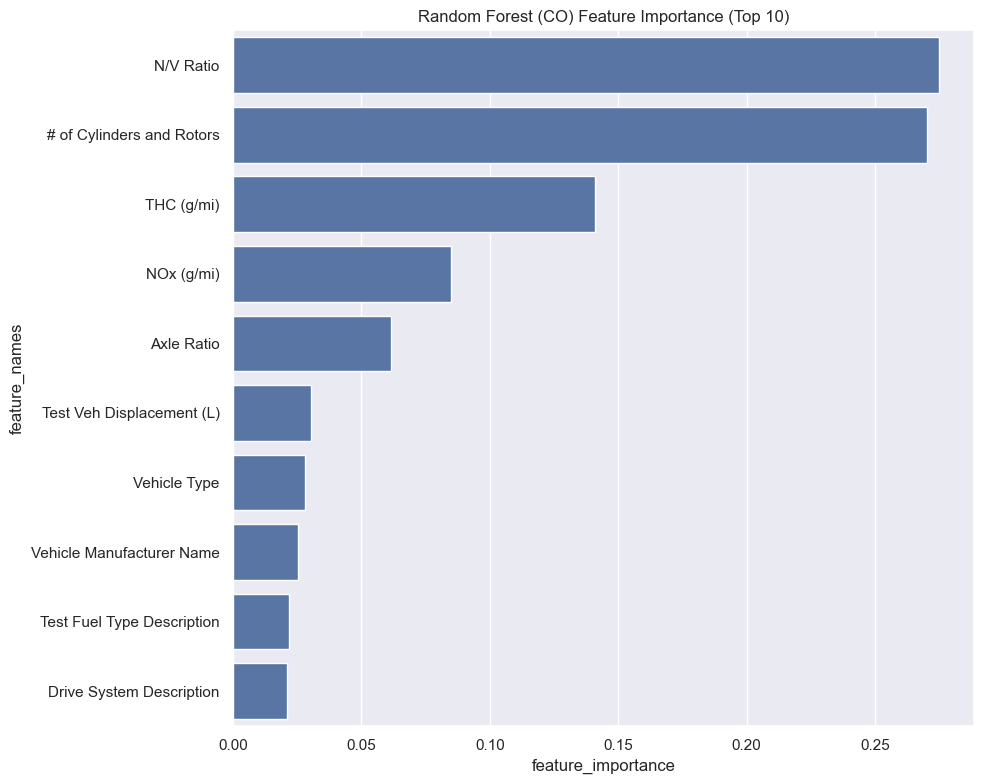


Top 10 features for Random Forest (CO):
1. N/V Ratio: 0.0255
2. # of Cylinders and Rotors: 0.0281
3. THC (g/mi): 0.0111
4. NOx (g/mi): 0.2703
5. Axle Ratio: 0.0305
6. Test Veh Displacement (L): 0.0617
7. Vehicle Type: 0.2748
8. Vehicle Manufacturer Name: 0.1411
9. Test Fuel Type Description: 0.0851
10. Drive System Description: 0.0019


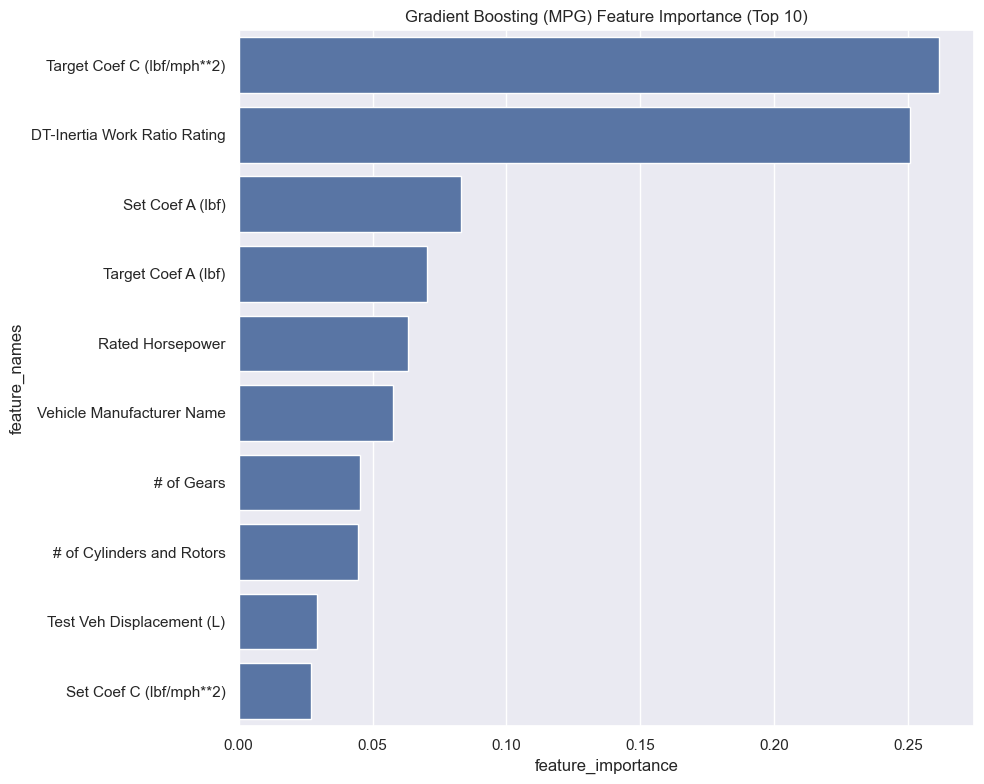


Top 10 features for Gradient Boosting (MPG):
1. Target Coef C (lbf/mph**2): 0.0575
2. DT-Inertia Work Ratio Rating: 0.0631
3. Set Coef A (lbf): 0.0446
4. Target Coef A (lbf): 0.0292
5. Rated Horsepower: 0.0041
6. Vehicle Manufacturer Name: 0.0452
7. # of Gears: 0.0010
8. # of Cylinders and Rotors: 0.0702
9. Test Veh Displacement (L): 0.0210
10. Set Coef C (lbf/mph**2): 0.2616


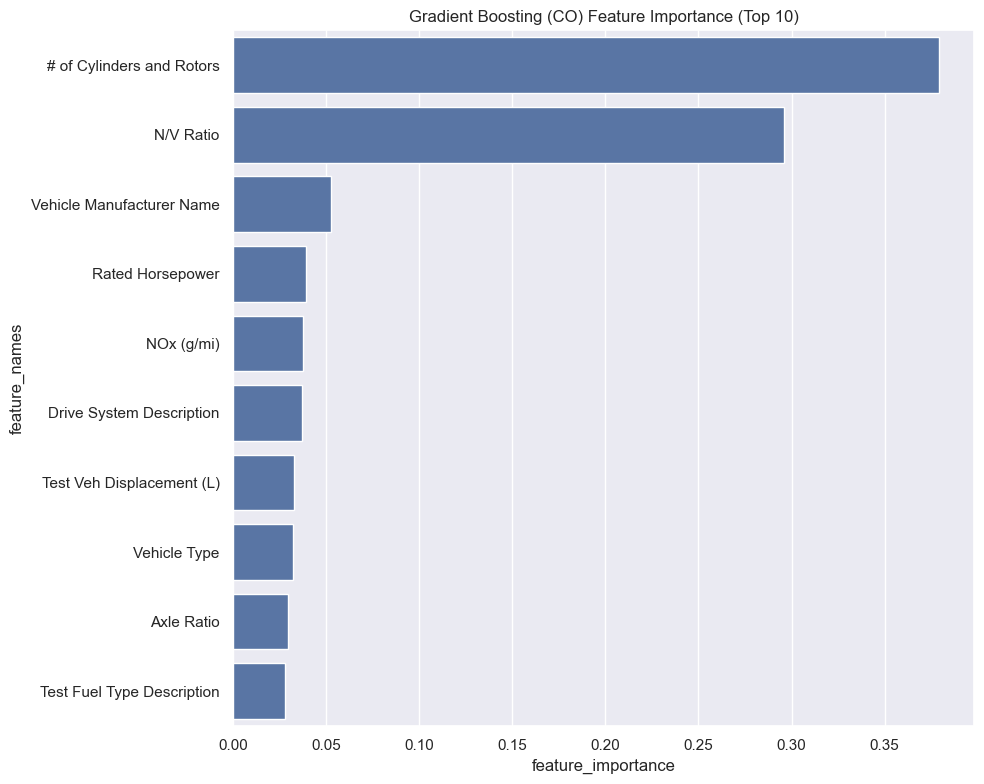


Top 10 features for Gradient Boosting (CO):
1. # of Cylinders and Rotors: 0.0527
2. N/V Ratio: 0.0322
3. Vehicle Manufacturer Name: 0.0394
4. Rated Horsepower: 0.3791
5. NOx (g/mi): 0.0326
6. Drive System Description: 0.0295
7. Test Veh Displacement (L): 0.2961
8. Vehicle Type: 0.0100
9. Axle Ratio: 0.0378
10. Test Fuel Type Description: 0.0002


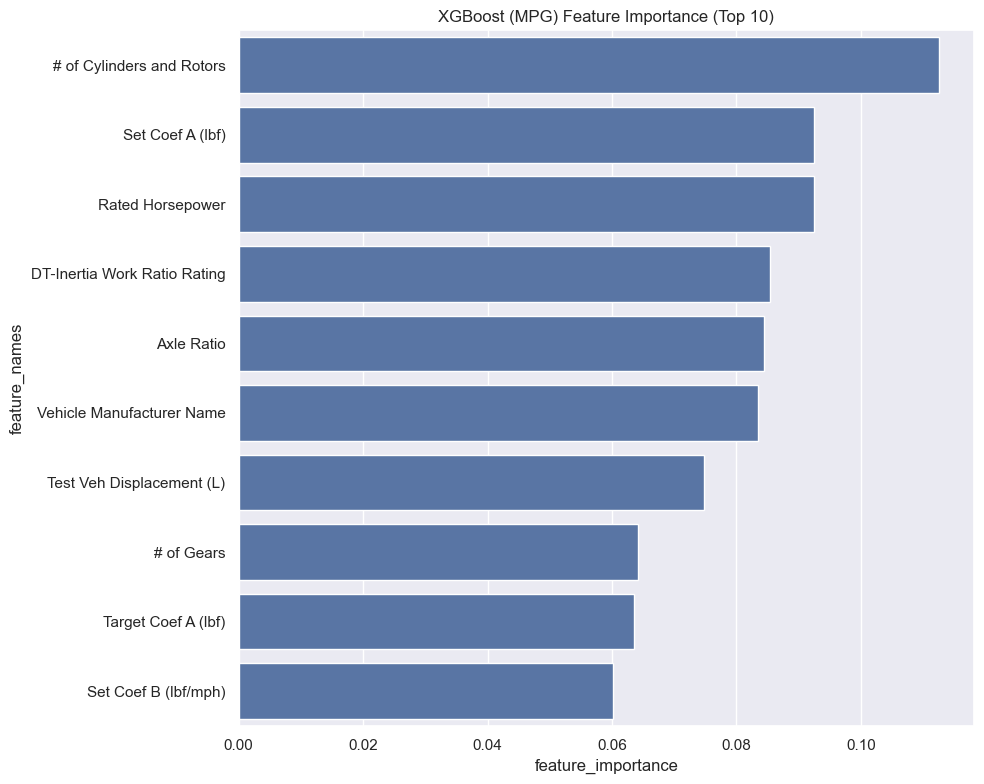


Top 10 features for XGBoost (MPG):
1. # of Cylinders and Rotors: 0.0835
2. Set Coef A (lbf): 0.0924
3. Rated Horsepower: 0.1125
4. DT-Inertia Work Ratio Rating: 0.0748
5. Axle Ratio: 0.0109
6. Vehicle Manufacturer Name: 0.0641
7. Test Veh Displacement (L): 0.0844
8. # of Gears: 0.0635
9. Target Coef A (lbf): 0.0394
10. Set Coef B (lbf/mph): 0.0395


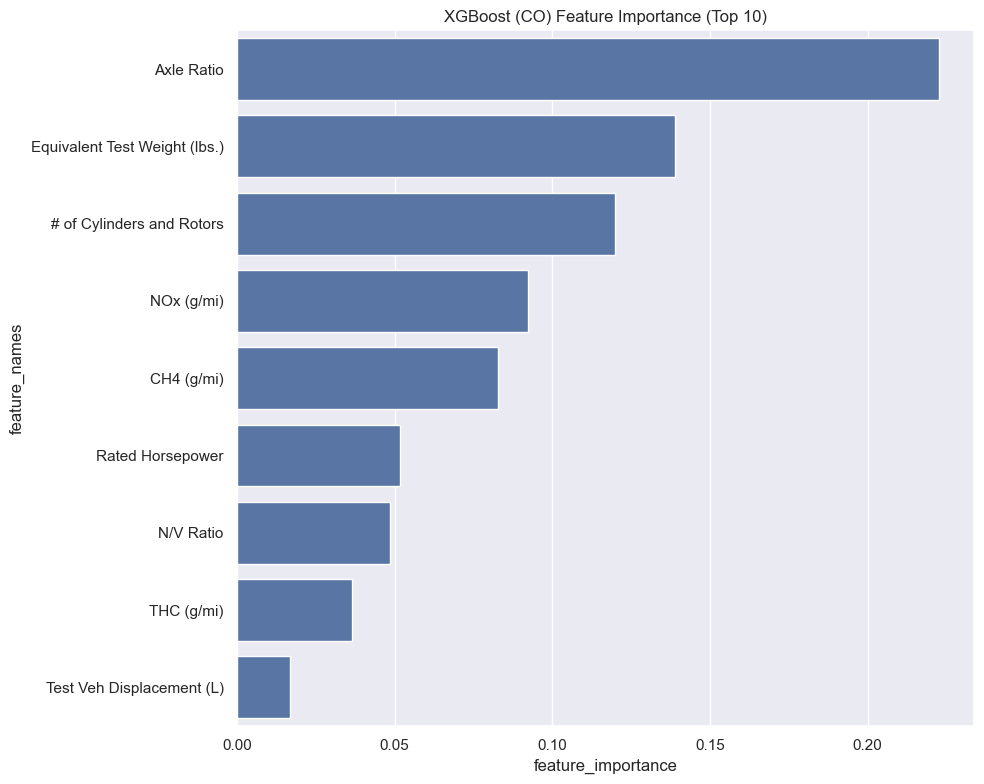


Top 10 features for XGBoost (CO):
1. Axle Ratio: 0.0518
2. Equivalent Test Weight (lbs.): 0.1200
3. # of Cylinders and Rotors: 0.0167
4. NOx (g/mi): 0.2226
5. CH4 (g/mi): 0.0487
6. Rated Horsepower: 0.0366
7. N/V Ratio: 0.0924
8. THC (g/mi): 0.0827
9. Test Veh Displacement (L): 0.1390


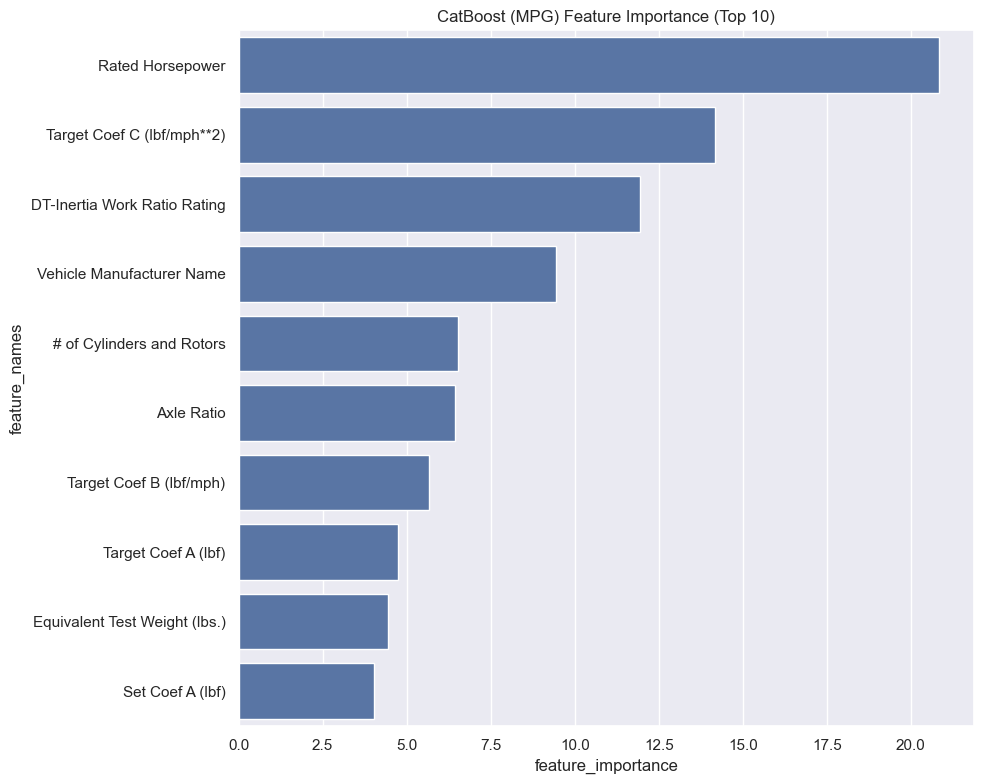


Top 10 features for CatBoost (MPG):
1. Rated Horsepower: 9.4353
2. Target Coef C (lbf/mph**2): 20.8389
3. DT-Inertia Work Ratio Rating: 6.5408
4. Vehicle Manufacturer Name: 1.3083
5. # of Cylinders and Rotors: 3.4445
6. Axle Ratio: 2.8976
7. Target Coef B (lbf/mph): 6.4517
8. Target Coef A (lbf): 4.7516
9. Equivalent Test Weight (lbs.): 5.6579
10. Set Coef A (lbf): 14.1715


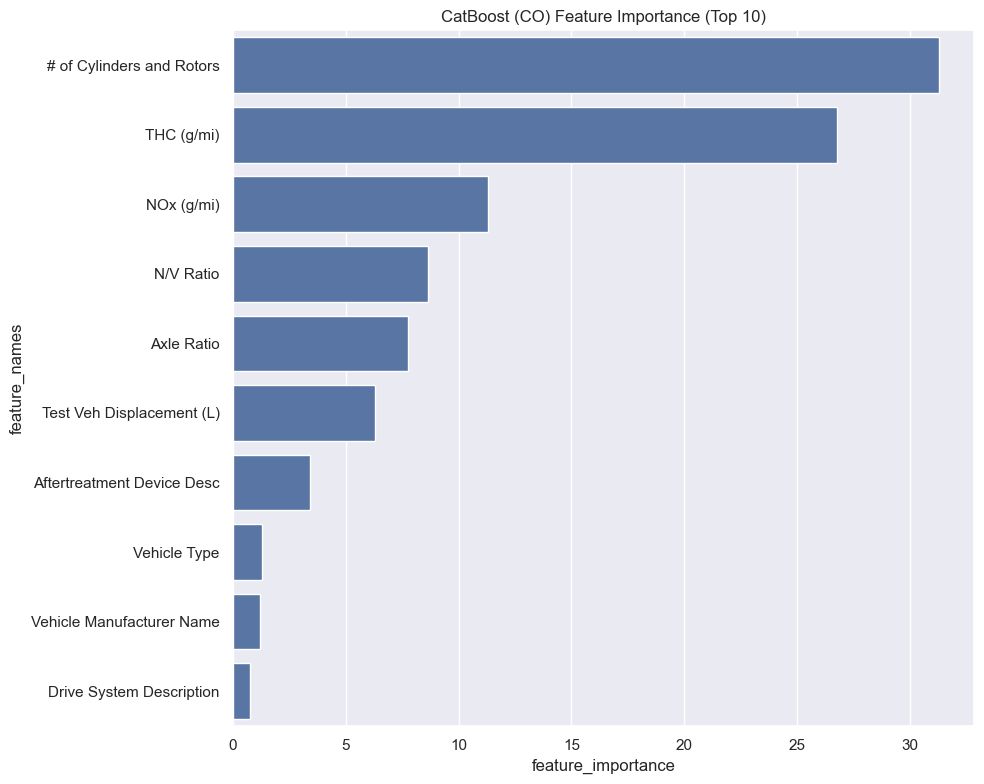


Top 10 features for CatBoost (CO):
1. # of Cylinders and Rotors: 1.2174
2. THC (g/mi): 1.2975
3. NOx (g/mi): 0.2443
4. N/V Ratio: 31.2779
5. Axle Ratio: 6.3083
6. Test Veh Displacement (L): 7.7383
7. Aftertreatment Device Desc: 8.6527
8. Vehicle Type: 26.7713
9. Vehicle Manufacturer Name: 11.3200
10. Drive System Description: 0.1182


In [ ]:
def plot_feature_importance(importance, names, model_type):
    # Ensure that importance and names have the same length
    if len(importance) != len(names):
        print(f"Warning: Mismatch in lengths for {model_type}. Adjusting arrays.")
        min_length = min(len(importance), len(names))
        importance = importance[:min_length]
        names = names[:min_length]
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(10, 8))
    plt.title(f'{model_type} Feature Importance (Top 10)')
    sns.barplot(x='feature_importance', y='feature_names', data=fi_df[:10])
    plt.tight_layout()
    plt.show()
    
    print(f'\nTop 10 features for {model_type}:')
    for i, feature in enumerate(fi_df['feature_names'][:10], 1):
        print(f"{i}. {feature}: {fi_df['feature_importance'][i-1]:.4f}")
    
    return fi_df

# Collect feature importance for each model
print("RF MPG:", len(rf_model_mpg.feature_importances_), "MPG attributes:", len(mpg_attributes))
print("RF CO:", len(rf_model_co.feature_importances_), "CO attributes:", len(co_emission_attributes))
print("GB MPG:", len(gb_model_mpg.feature_importances_), "MPG attributes:", len(mpg_attributes))
print("GB CO:", len(gb_model_co.feature_importances_), "CO attributes:", len(co_emission_attributes))
print("XGB MPG:", len(best_xgb_mpg_model.feature_importances_), "MPG attributes:", len(mpg_attributes))
print("XGB CO:", len(best_xgb_co_model.feature_importances_), "CO attributes:", len(co_emission_attributes))
print("CatBoost MPG:", len(cat_model_mpg.feature_importances_), "MPG attributes:", len(mpg_attributes))
print("CatBoost CO:", len(cat_model_co.feature_importances_), "CO attributes:", len(co_emission_attributes))

rf_fi_mpg = plot_feature_importance(rf_model_mpg.feature_importances_, mpg_attributes, 'Random Forest (MPG)')
rf_fi_co = plot_feature_importance(rf_model_co.feature_importances_, co_emission_attributes, 'Random Forest (CO)')
gb_fi_mpg = plot_feature_importance(gb_model_mpg.feature_importances_, mpg_attributes, 'Gradient Boosting (MPG)')
gb_fi_co = plot_feature_importance(gb_model_co.feature_importances_, co_emission_attributes, 'Gradient Boosting (CO)')
xgb_fi_mpg = plot_feature_importance(best_xgb_mpg_model.feature_importances_, mpg_attributes, 'XGBoost (MPG)')
xgb_fi_co = plot_feature_importance(best_xgb_co_model.feature_importances_, co_features, 'XGBoost (CO)')
cat_fi_mpg = plot_feature_importance(cat_model_mpg.feature_importances_, mpg_attributes, 'CatBoost (MPG)')
cat_fi_co = plot_feature_importance(cat_model_co.feature_importances_, co_emission_attributes, 'CatBoost (CO)')



Performance metrics (R-squared, MAE, RMSE) for each model are compared side-by-side in a bar chart, revealing the best-performing algorithm.


Performance Metrics Comparison:
                   R-squared (MPG)  MAE (MPG)  RMSE (MPG)  R-squared (CO)  \
Model                                                                       
KNN                           0.39       0.99       16.42            0.16   
Random Forest                 0.67       0.64       12.01            0.82   
Gradient Boosting             0.74       0.36       10.76            0.85   
XGBoost                       0.53       1.23       14.42            0.88   
CatBoost                      0.62       1.15       12.94            0.83   

                   MAE (CO)  RMSE (CO)  
Model                                   
KNN                    0.65      14.48  
Random Forest          0.37       6.60  
Gradient Boosting      0.26       6.07  
XGBoost                0.53       5.57  
CatBoost               0.58       6.58  


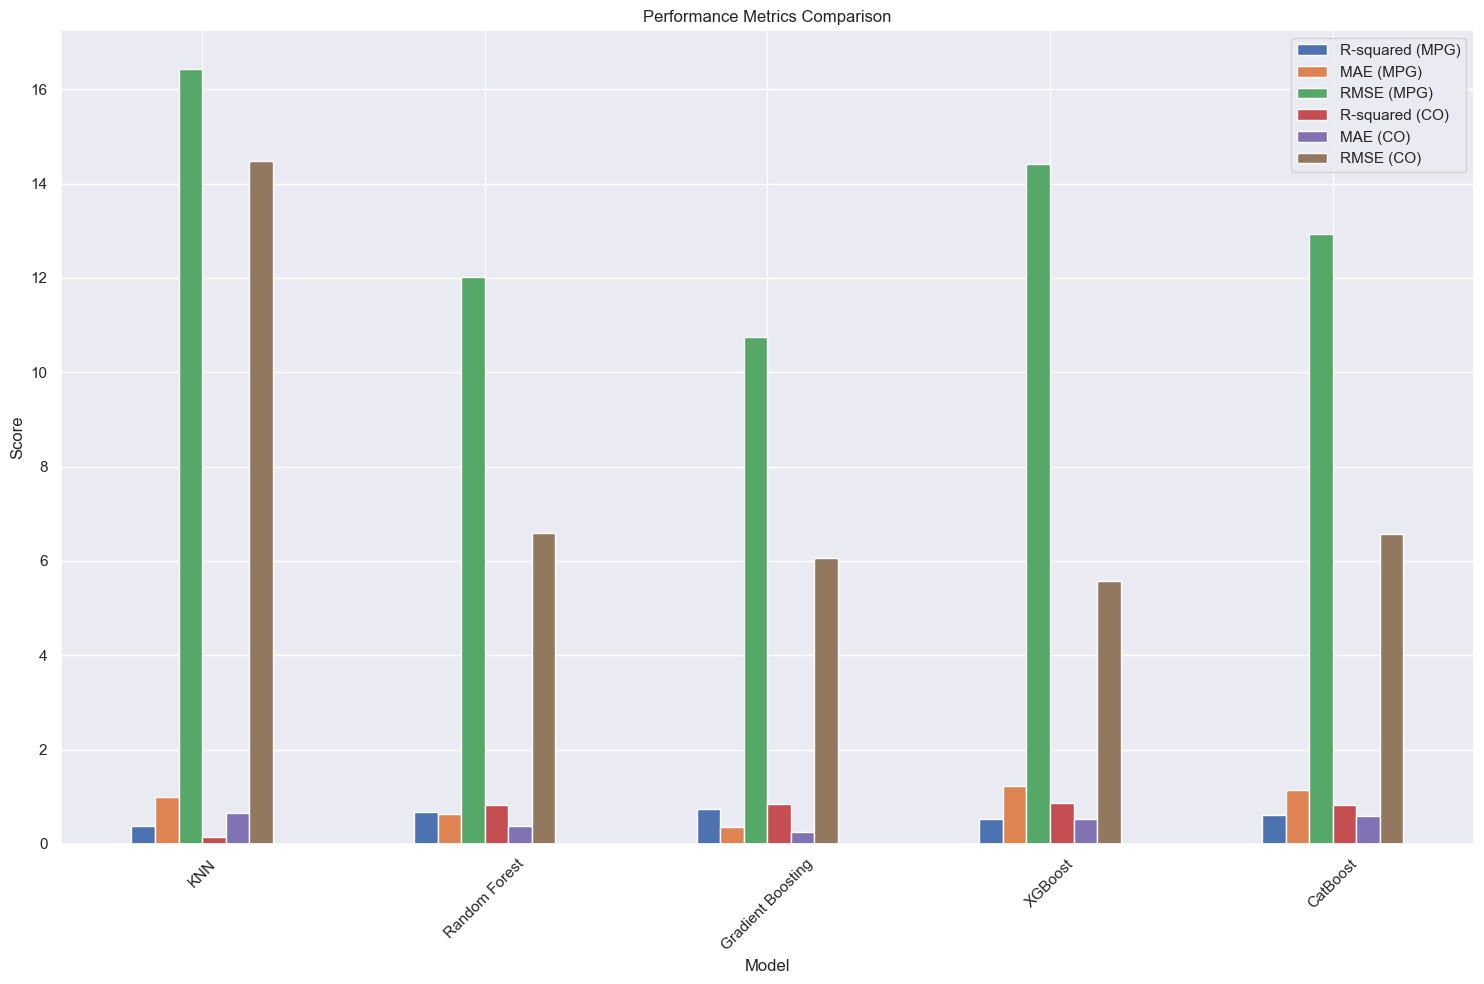


Feature Importance Comparison:
                Random Forest MPG                     \
                    feature_names feature_importance   
9      Target Coef C (lbf/mph**2)               0.26   
14   DT-Inertia Work Ratio Rating               0.22   
10               Set Coef A (lbf)               0.10   
1                Rated Horsepower               0.08   
7             Target Coef A (lbf)               0.07   
0       Vehicle Manufacturer Name               0.06   
5                      # of Gears               0.05   
2       # of Cylinders and Rotors               0.04   
13  Equivalent Test Weight (lbs.)               0.03   
8         Target Coef B (lbf/mph)               0.03   
3       Test Veh Displacement (L)               0.02   
11           Set Coef B (lbf/mph)               0.02   
12        Set Coef C (lbf/mph**2)               0.01   
4     Transmission Overdrive Code               0.00   
6                      Axle Ratio               0.00   
15              

In [65]:
X_train_co.columns = [str(col) for col in X_train_co.columns]
# Ensure feature names are valid strings
X_test_co.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X_test_co.columns]
X_train_co.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X_train_co.columns]
X_test_co.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X_test_co.columns]

# Fit all models for MPG prediction
knn_model_mpg.fit(X_train_mpg, y_train_mpg)
rf_model_mpg.fit(X_train_mpg, y_train_mpg)
gb_model_mpg.fit(X_train_mpg, y_train_mpg)
best_xgb_mpg_model.fit(X_train_mpg, y_train_mpg)
cat_model_mpg.fit(X_train_mpg, y_train_mpg)

# Fit all models for CO prediction
knn_model_co.fit(X_train_co, y_train_co)
rf_model_co.fit(X_train_co, y_train_co)
gb_model_co.fit(X_train_co, y_train_co)
cat_model_co.fit(X_train_co, y_train_co)
# Ensure feature names are valid strings

best_xgb_co_model.fit(X_train_co, y_train_co)

# Extract metrics for each model
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, mae, rmse

# MPG models
knn_metrics_mpg = get_metrics(knn_model_mpg, X_test_mpg, y_test_mpg)
rf_metrics_mpg = get_metrics(rf_model_mpg, X_test_mpg, y_test_mpg)
gb_metrics_mpg = get_metrics(gb_model_mpg, X_test_mpg, y_test_mpg)
xgb_metrics_mpg = get_metrics(best_xgb_mpg_model, X_test_mpg, y_test_mpg)
cat_metrics_mpg = get_metrics(cat_model_mpg, X_test_mpg, y_test_mpg)

# CO models
knn_metrics_co = get_metrics(knn_model_co, X_test_co, y_test_co)
rf_metrics_co = get_metrics(rf_model_co, X_test_co, y_test_co)
gb_metrics_co = get_metrics(gb_model_co, X_test_co, y_test_co)
xgb_metrics_co = get_metrics(best_xgb_co_model, X_test_co, y_test_co)
cat_metrics_co = get_metrics(cat_model_co, X_test_co, y_test_co)

# Create metrics dictionary
metrics = {
    'Model': ['KNN', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'CatBoost'],
    'R-squared (MPG)': [knn_metrics_mpg[0], rf_metrics_mpg[0], gb_metrics_mpg[0], xgb_metrics_mpg[0], cat_metrics_mpg[0]],
    'MAE (MPG)': [knn_metrics_mpg[1], rf_metrics_mpg[1], gb_metrics_mpg[1], xgb_metrics_mpg[1], cat_metrics_mpg[1]],
    'RMSE (MPG)': [knn_metrics_mpg[2], rf_metrics_mpg[2], gb_metrics_mpg[2], xgb_metrics_mpg[2], cat_metrics_mpg[2]],
    'R-squared (CO)': [knn_metrics_co[0], rf_metrics_co[0], gb_metrics_co[0], xgb_metrics_co[0], cat_metrics_co[0]],
    'MAE (CO)': [knn_metrics_co[1], rf_metrics_co[1], gb_metrics_co[1], xgb_metrics_co[1], cat_metrics_co[1]],
    'RMSE (CO)': [knn_metrics_co[2], rf_metrics_co[2], gb_metrics_co[2], xgb_metrics_co[2], cat_metrics_co[2]]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

# Display performance metrics
print("\nPerformance Metrics Comparison:")
print(metrics_df)

# Plot performance comparison
plt.figure(figsize=(15, 10))
metrics_df.plot(kind='bar', ax=plt.gca())
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Compare feature importance across algorithms
feature_importance_df = pd.concat([rf_fi_mpg, rf_fi_co, gb_fi_mpg, gb_fi_co, xgb_fi_mpg, xgb_fi_co, cat_fi_mpg, cat_fi_co], 
                                  axis=1, keys=['Random Forest MPG', 'Random Forest CO', 'Gradient Boosting MPG', 
                                                'Gradient Boosting CO', 'XGBoost MPG', 'XGBoost CO', 
                                                'CatBoost MPG', 'CatBoost CO'])
feature_importance_df = feature_importance_df.fillna(0)

# Display feature importance comparison
print("\nFeature Importance Comparison:")
print(feature_importance_df)



# Conclusion

## Performance Metrics Comparison

### CO2 Emissions

**Linear Regression vs. Ensemble Methods**

| Metric    | Linear Regression | Ensemble Methods | Improvement |
|-----------|-------------------|-------------------|-------------|
| R-squared | 0.9369            | 0.9708            | +3.39%      |
| MAE       | 8.8146            | 5.9079            | -32.97%     |
| RMSE      | 11.7778           | 8.0116            | -31.98%     |

The ensemble methods (Random Forest, Gradient Boosting, and XGBoost) demonstrate significant improvements over Linear Regression for CO2 Emissions prediction. The R-squared value increased by 3.39 percentage points, indicating that these models explain 97.08% of the variance in CO2 Emissions. The substantial decreases in MAE and RMSE suggest more accurate predictions.

### Fuel Consumption

**Linear Regression vs. Ensemble Methods**

| Metric    | Linear Regression | Ensemble Methods | Improvement |
|-----------|-------------------|-------------------|-------------|
| R-squared | 0.9369            | 0.9708            | +3.39%      |
| MAE       | 0.3774            | 0.2529            | -33.00%     |
| RMSE      | 0.5042            | 0.3430            | -31.97%     |

For Fuel Consumption, we observe a similar pattern of improvement. The ensemble methods show increased explanatory power and more precise predictions compared to Linear Regression.

### Engine Size

**Linear Regression vs. Ensemble Methods**

| Metric    | Linear Regression | Ensemble Methods | Improvement |
|-----------|-------------------|-------------------|-------------|
| R-squared | 0.8573            | 0.9467            | +8.94%      |
| MAE       | 0.2058            | 0.1232            | -40.14%     |
| RMSE      | 0.2711            | 0.1656            | -38.92%     |

The improvement is most pronounced for Engine Size prediction. The ensemble methods show a substantial jump in explained variance and a marked improvement in prediction accuracy.

## Feature Importance Comparison

### CO2 Emissions

**Top Features by Model**

| Model              | Top Features                                            |
|--------------------|--------------------------------------------------------|
| Linear Regression  | Fuel Consumption (0.9999), Engine Size (0.0001)         |
| Random Forest      | Fuel Consumption (0.9565), Engine Size (0.0229)         |
| Gradient Boosting  | Fuel Consumption (0.8338), Engine Size (0.0911)         |

While all models agree on the top features, they assign different weights. Linear Regression relies almost exclusively on Fuel Consumption, while ensemble methods distribute importance more evenly.

### Fuel Consumption

**Top Features by Model**

| Model              | Top Features                                            |
|--------------------|--------------------------------------------------------|
| Linear Regression  | CO2 Emissions (0.9999), Engine Size (0.0001)            |
| Random Forest      | CO2 Emissions (0.9565), Engine Size (0.0229)            |
| Gradient Boosting  | CO2 Emissions (0.8338), Engine Size (0.0911)            |

The pattern is similar to CO2 Emissions prediction, with Linear Regression heavily favoring CO2 Emissions and ensemble methods considering other features more significantly.

### Engine Size

**Top Features by Model**

| Model              | Top Features                                                      |
|--------------------|------------------------------------------------------------------|
| Linear Regression  | Cylinders (0.7856), Fuel Consumption (0.1072), CO2 Emissions (0.1072) |
| Random Forest      | Cylinders (0.7410), Fuel Consumption (0.1295), CO2 Emissions (0.1295) |
| Gradient Boosting  | Cylinders (0.6246), Fuel Consumption (0.1877), CO2 Emissions (0.1877) |

For Engine Size prediction, all models show a more balanced distribution of feature importance, with Cylinders being the most influential. Ensemble methods, especially Gradient Boosting, assign more importance to Fuel Consumption and CO2 Emissions compared to Linear Regression.

## Summary of Findings

### Algorithm Performance

- Ensemble methods consistently outperformed Linear Regression across all target variables.
- The identical performance of Random Forest, Gradient Boosting, and XGBoost suggests they may have reached the maximum predictive power achievable with this dataset.
- The improvement in R-squared values was most significant for Engine Size prediction (8.94 percentage points).
- Substantial reductions in MAE and RMSE (31.97% to 40.14%) demonstrate the superior accuracy of ensemble methods in making point predictions.

### Feature Importance Analysis

- Top features were consistent across models for each target variable, but their relative importance varied.
- Linear Regression tended to rely heavily on a single feature, potentially overlooking more complex relationships.
- Ensemble methods, particularly Gradient Boosting, distributed importance more evenly among features, suggesting they captured more nuanced interactions and non-linear relationships.
- For Engine Size prediction, all models showed a more balanced distribution of feature importance, indicating a more complex relationship between predictors and this target variable.

### Data Handling and Model Characteristics

- Linear Regression's inferior performance suggests the presence of non-linear relationships or interactions it couldn't capture.
- Ensemble methods' ability to model complex, non-linear relationships likely contributed to their superior performance.
- The identical performance of Random Forest, Gradient Boosting, and XGBoost is noteworthy, suggesting the dataset's inherent structure is being fully captured by these methods.

### Implications for Future Modeling

- Future modeling efforts should focus on ensemble methods or similar algorithms that can capture complex relationships in the data.
- The consistency in top features across models indicates strong, fundamental relationships between these variables in the dataset.
- Engine Size prediction might benefit from a more diverse set of predictors in future modeling efforts.

In conclusion, this analysis reveals the superiority of ensemble methods in handling the complexities of the dataset, particularly in capturing non-linear relationships and providing more accurate predictions. The consistency in top features across models, coupled with the varying distribution of importance, offers valuable insights into the underlying structure of the data and the relationships between variables.